### 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath =  '/content/drive/MyDrive/Colab/file/total_review_tokens.csv'

In [ ]:
import io
import pandas as pd

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df

,product_name,rating,skin_type,review,tokens,label
0,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,제품은 정말 사용해보시라고 추천드리고싶어요진짜 좋은 제품이거든요사춘기때 여...,"['제품', '정말', '사용', '추천', '드리', '진짜', '좋', '제품'...",1
1,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,간단정리 자극없이 무난함 봄여름가을에 적당한 수분감 겨...,"['정리', '자극', '없이', '봄여름', '수분감', '겨울', '겹', '레...",1
2,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,나의 피부상태 복합성 트러블 조금만 자극적이면 피부 뒤집어짐 장점 여드름...,"['피부', '상태', '복합성', '조금', '자극', '뒤집', '장점', '짜...",1
3,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,지성,또 샀어요 진짜 닥터지 최고입니다 건성분들이 쓰시기에는 너무 빨리 날아가...,"['사', '진짜', '최고', '건성', '쓰', '너무', '빨리', '날아가'...",1
4,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,닥터지 크림은 워낙 유명하기도 하고 성분이 순하고 진정효과가 좋아서 꾸준히 구매해왔...,"['워낙', '하', '성분', '순하', '진정효과', '꾸준히', '구매', '...",1
...,...,...,...,...,...,...
92460,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,최애 입니다이제 이것만 쓸거예요또사러 가야지 눈누난나 신난다,"['애', '입', '쓰', '가', '눈', '신나']",1
92461,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,자극이 없고 일단은 너무 촉촉해서 좋아요 이것만 쓰게 될것같아,"['자극', '없', '일단', '너무', '좋', '쓰', '되', '같']",1
92462,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,배송도 빠르고 세일할 때 사야할거 같아서 샀어요송악크림 건성한테 정말 좋을거같아요,"['배송', '빠르', '세일', '때', '사', '같', '사', '요', '건...",1
92463,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,가벼운제형이고 끈적거리지 않아서 좋았어요 그리고 진정에도 좋습니다,"['가볍', '끈적거리', '좋', '진정', '좋']",1


In [ ]:
df_=df.loc[df['label']!=-1] #별점값이 4였던 값들 제외

In [ ]:
df_=df_.reset_index(drop=True)

In [ ]:
df_['label'].value_counts()

1    73532
0     5150
Name: label, dtype: int64

In [ ]:
df_ = df_.loc[:,["tokens","label"]]

In [ ]:
from ast import literal_eval

In [ ]:
df_['tokens'] = df_['tokens'].apply(literal_eval)

### TF-IDF

In [ ]:
from gensim import corpora, models

In [ ]:
below = len(df_)//100

In [ ]:
dictionary = corpora.Dictionary(df_['tokens'])
dictionary.filter_extremes(no_below=below)
bow_corpus = [dictionary.doc2bow(text) for text in df_['tokens']]
        
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
len_dic = len(dictionary)
data_size = len(corpus_tfidf)

print(len_dic, data_size)

464 78682


In [ ]:
feature_list = [[0]*len_dic for i in range(data_size)] #len(dictionary)*len(data)

In [ ]:
for i in range(data_size):
    for j in corpus_tfidf[i]:
        feature_list[i][j[0]] = j[1]

In [ ]:
label = df_['label'].values.tolist()

In [ ]:
import joblib

In [ ]:
joblib.dump(dictionary, '/content/drive/MyDrive/Colab/file/dictionary.pkl')

['/content/drive/MyDrive/Colab/file/dictionary.pkl']

### UnderSampling

In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 25.5 MB/s 
     |████████████████████████████████| 199 kB 54.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_list, label, test_size=0.3, random_state=123)

In [ ]:
from collections import Counter

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
under_X, under_y = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(under_y))

Counter({1: 51467, 0: 3610})
Counter({0: 3610, 1: 3610})


### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
model =  LogisticRegression(penalty="elasticnet", solver="saga")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio" :[ .1, .5, .7, .9, .95, .99, 1]}
# define search
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='f1')
# perform the search
results = grid_search.fit(under_X, under_y)

# summarize
print('best_score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

best_score: 0.763
Config: {'C': 0.1, 'l1_ratio': 0.1}


In [ ]:
import joblib
joblib.dump(results.best_estimator_, '/content/drive/MyDrive/Colab/file/total_lr_random_model.pkl')

['/content/drive/MyDrive/Colab/file/total_lr_random_model.pkl']

### best_estimator_불러오기

In [ ]:
import joblib

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab/file/total_lr_random_model.pkl')

### 성능평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, classification_report

In [ ]:
print('model.coef_.sum():',loaded_model.coef_.sum())
print('model.intercept_:',loaded_model.intercept_)

pred_y = loaded_model.predict(X_test)
print('r2_score: ',r2_score(y_test,pred_y))
print('mse: ', mean_squared_error(y_test,pred_y))
print('accuracy: ', accuracy_score(y_test, pred_y))
print('f1: ', f1_score(y_test, pred_y))

model.coef_.sum(): 19.004026459723473
model.intercept_: [0.00815667]
r2_score:  -2.645634945159079
mse:  0.22232577843677187
accuracy:  0.7776742215632281
f1:  0.8681473292799358


In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.18      0.70      0.29      1540
     class 1       0.97      0.78      0.87     22065

    accuracy                           0.78     23605
   macro avg       0.58      0.74      0.58     23605
weighted avg       0.92      0.78      0.83     23605



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tr_pred_y = loaded_model.predict(under_X)
cm_tr = confusion_matrix(under_y,tr_pred_y)

Text(33.0, 0.5, 'Actual')

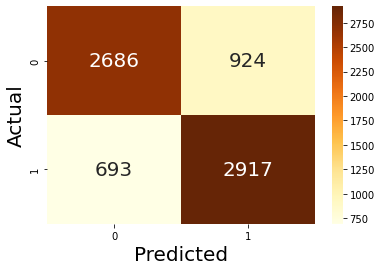

In [ ]:
sns.heatmap(cm_tr, annot=True, annot_kws={"size": 20}, cmap='YlOrBr',fmt='d')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [ ]:
cm_te = confusion_matrix(y_test, pred_y)

Text(33.0, 0.5, 'Actual')

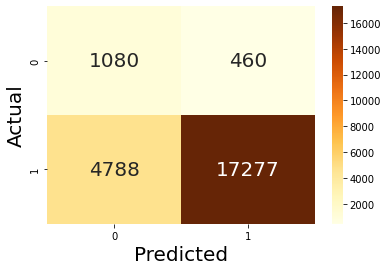

In [ ]:
sns.heatmap(cm_te, annot=True, annot_kws={"size": 20}, cmap='YlOrBr',fmt='d')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

### 단어 극성 확인

In [ ]:
feature_zip = []

In [ ]:
for idx, val in enumerate(loaded_model.coef_[0]):
    feature_zip.append((idx, val))

In [ ]:
feature_zip_sorted = sorted(feature_zip, key = lambda item: item[1])

In [ ]:
feature_zip_sorted

[(31, -1.9635424231709508),
 (133, -1.94628768446363),
 (95, -1.7382288406569635),
 (264, -1.6851295209118893),
 (196, -1.5990351381253867),
 (30, -1.4503641235353182),
 (214, -1.3568954030279543),
 (235, -0.9904525423096042),
 (405, -0.9447073131796538),
 (70, -0.8360644929053092),
 (24, -0.8300812885216516),
 (40, -0.7403572505601806),
 (118, -0.6916211937512013),
 (3, -0.6812916706396268),
 (71, -0.6678433540556841),
 (305, -0.6663341936287097),
 (382, -0.6290645442489461),
 (106, -0.6223842710388731),
 (211, -0.6049205109382974),
 (151, -0.5807448222183483),
 (7, -0.5639274648196295),
 (154, -0.5452353683342469),
 (97, -0.5441097656866433),
 (182, -0.5082837033949428),
 (13, -0.4966335537043994),
 (148, -0.4874957181784148),
 (260, -0.4638105045575726),
 (161, -0.45337557178552557),
 (207, -0.4507772317377591),
 (364, -0.44836109037557936),
 (216, -0.4443525010360916),
 (153, -0.44030637155193303),
 (115, -0.40001503810157724),
 (104, -0.3909918648812056),
 (127, -0.378359455206123

In [ ]:
dict_sorted_li = []

In [ ]:
for ft in feature_zip_sorted:
  dict_sorted_li.append((dictionary[ft[0]],ft[1]))

##### 긍정

In [ ]:
sorted(dict_sorted_li[-30:],key = lambda item: item[1],reverse=True)

[('진짜', 1.1374787291194057),
 ('딱', 1.1110999182106274),
 ('만족', 1.065183078573818),
 ('없이', 1.0402058742256126),
 ('순하', 0.9538757754705546),
 ('꾸준히', 0.9045396391347892),
 ('최고', 0.8812627644459805),
 ('강추', 0.8768355685209445),
 ('짱', 0.8740745607177424),
 ('아침', 0.8379787367534914),
 ('있', 0.7909134898058898),
 ('피부', 0.7863350975701814),
 ('항상', 0.7549100233058751),
 ('확실히', 0.7477705799449439),
 ('정말', 0.7307835838428131),
 ('되', 0.713930876130511),
 ('너무', 0.7113348746916224),
 ('정착', 0.6962485028046591),
 ('잘', 0.6374150243430687),
 ('통째', 0.6352986666175616),
 ('요즘', 0.6243371108104042),
 ('아주', 0.6141055241493023),
 ('순', 0.6056156134785333),
 ('자', 0.6042594761383636),
 ('굿', 0.59089344938249),
 ('진정', 0.5864061796601924),
 ('찾', 0.582604813826216),
 ('같이', 0.5734255031093931),
 ('마음', 0.5699561271085419),
 ('보습', 0.5685683493453481)]

##### 부정

In [ ]:
dict_sorted_li[:30]

[('모르', -1.9635424231709508),
 ('안', -1.94628768446363),
 ('아쉽', -1.7382288406569635),
 ('별로', -1.6851295209118893),
 ('그냥', -1.5990351381253867),
 ('맞', -1.4503641235353182),
 ('좀', -1.3568954030279543),
 ('기대', -0.9904525423096042),
 ('건지', -0.9447073131796538),
 ('하', -0.8360644929053092),
 ('따갑', -0.8300812885216516),
 ('생각', -0.7403572505601806),
 ('광고', -0.6916211937512013),
 ('같', -0.6812916706396268),
 ('효과', -0.6678433540556841),
 ('걸', -0.6663341936287097),
 ('딱히', -0.6290645442489461),
 ('지성', -0.6223842710388731),
 ('솔직히', -0.6049205109382974),
 ('나쁘', -0.5807448222183483),
 ('그러', -0.5639274648196295),
 ('느끼', -0.5452353683342469),
 ('올라오', -0.5441097656866433),
 ('약간', -0.5082837033949428),
 ('느낌', -0.4966335537043994),
 ('기름', -0.4874957181784148),
 ('괜찮', -0.4638105045575726),
 ('시간', -0.45337557178552557),
 ('부족', -0.4507772317377591),
 ('개인', -0.44836109037557936)]

In [ ]:
coef_dict_df = pd.DataFrame(dict_sorted_li, columns = ['words','coef'])

In [ ]:
coef_dict_df.to_csv('/content/drive/MyDrive/Colab/file/coef_dict.csv',index = False, columns = ['words', 'coef'])